## Problem Statement :-

At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.In this challenge, we need to identify which customers will make a specific transaction in
the future, irrespective of the amount of money transacted.

## Lifecycle In A Data Science Project

    1. Data Analysis
    2. Feature Engineering
    3. Feature Selection
    4. Model Building
    5. Model Deployment


In [2]:
!pip install imblearn
!pip install lightgbm
#Importing the required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve, classification_report,auc,f1_score,accuracy_score
from sklearn.model_selection import cross_val_predict,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.22.1.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'imblearn'

In [8]:
#Setting the working directory
os.chdir("C:/Users/WIN 10/Desktop/s..pro")

In [9]:
#Loading the dataframe to work on
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Understanding the Data :- 

In [4]:
#Checking first 5 rows of train dataset to get an overview of the trin data
df.head()
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
#Checking the number of rows and columns present in the train dataset
print("The shape of the train dataset is",df.shape)
print("The shape of the test dataset is",df_test.shape)

The shape of the train dataset is (200000, 202)
The shape of the test dataset is (200000, 201)


In [6]:
df.describe()
df_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


## Exploratory Data Analysis :-


In Exploratory Data Analysis We will Analyze To Find out the below stuff

    Missing Values
    All The Numerical Variables
    Distribution of the Numerical Variables
    Categorical Variables
    Outliers
    

In [7]:
#Checking the data type of all the variables
df.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [8]:
#Filtering the data types of float variables
Numerical_features = [feature for feature in df.columns if df[feature].dtypes =='float64']
Numerical_features_test = [feature for feature in df_test.columns if df_test[feature].dtypes =='float64']

In [9]:
#length of elements present in list
print(len(Numerical_features))
print(len(Numerical_features_test))

200
200


Here we can see that in the given dataset total number of features are 202 out of which 200 features are of data type float64, rest 2 features ID_code(object) and target(int64)

## Missing Values 

In [10]:
#Lets check for the missing values present in the dataset
missing_feature = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
missing_feature_test = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>=1]

In [11]:
print(missing_feature)
print(missing_feature_test)

[]
[]


There are no Missing values present in the train and test dataset

## Data Visualization
#### Distribution of Numerical Variables 

In [12]:
def Plot_feature_distribution(df1,df2,label1,label2,features):
    i=0
    sns.set_style =('whitegrid')
    plt.figure()
    fig,ax =plt.subplots(10,10,figsize =(18,22))
    
    for feature in features:
        i +=1
        plt.subplot(10,10,i)
        sns.kdeplot(df1[feature],bw=0.5, label=label1)
        sns.kdeplot(df2[feature],bw=0.5,label=label2)
        plt.xlabel(feature,fontsize = 9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

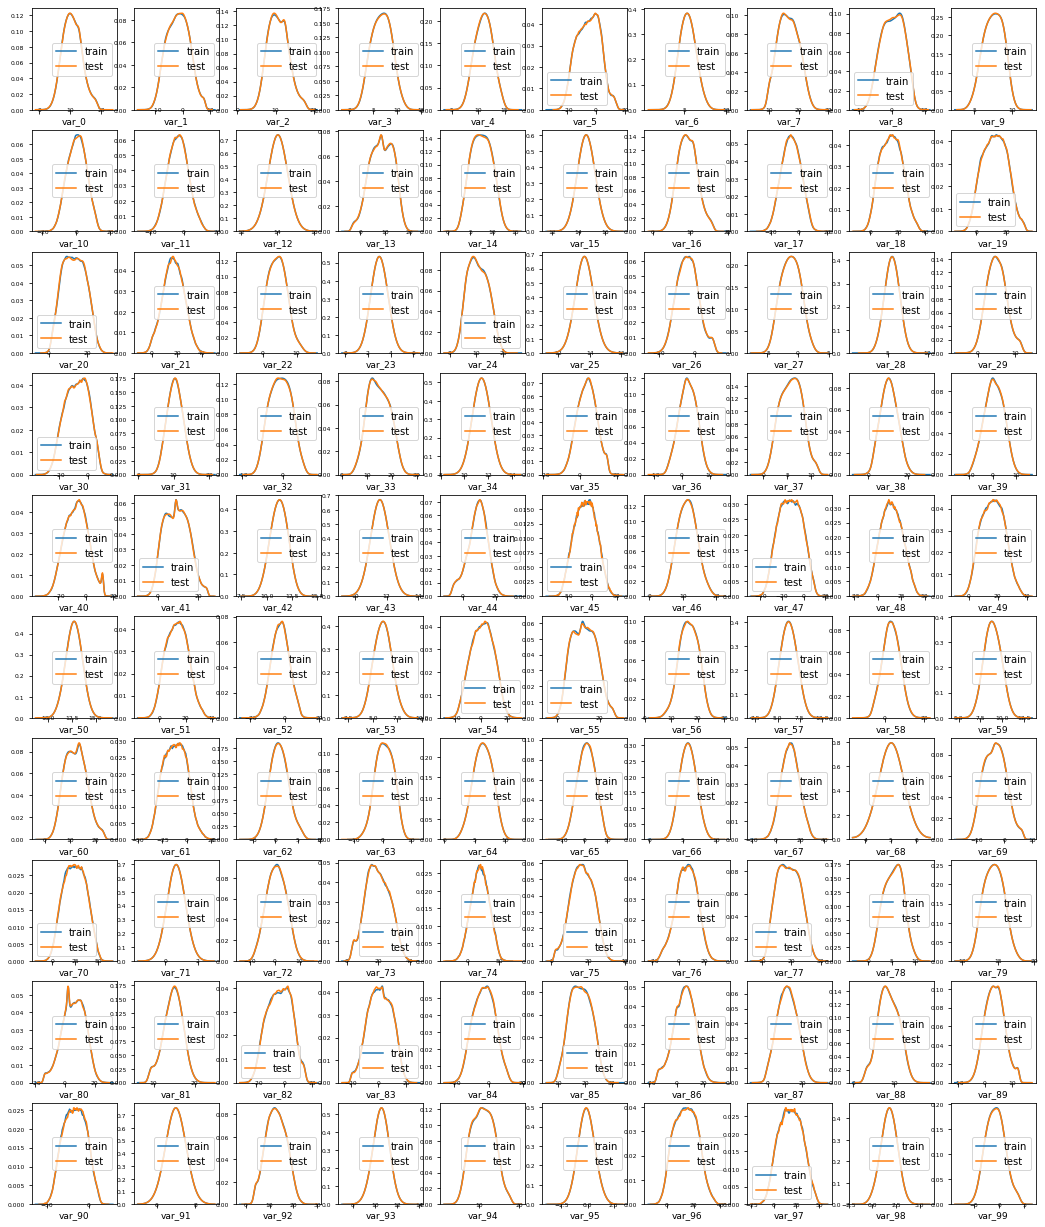

In [13]:
features = df.columns.values[2:102]
Plot_feature_distribution(df,df_test,"train","test",features)

<Figure size 432x288 with 0 Axes>

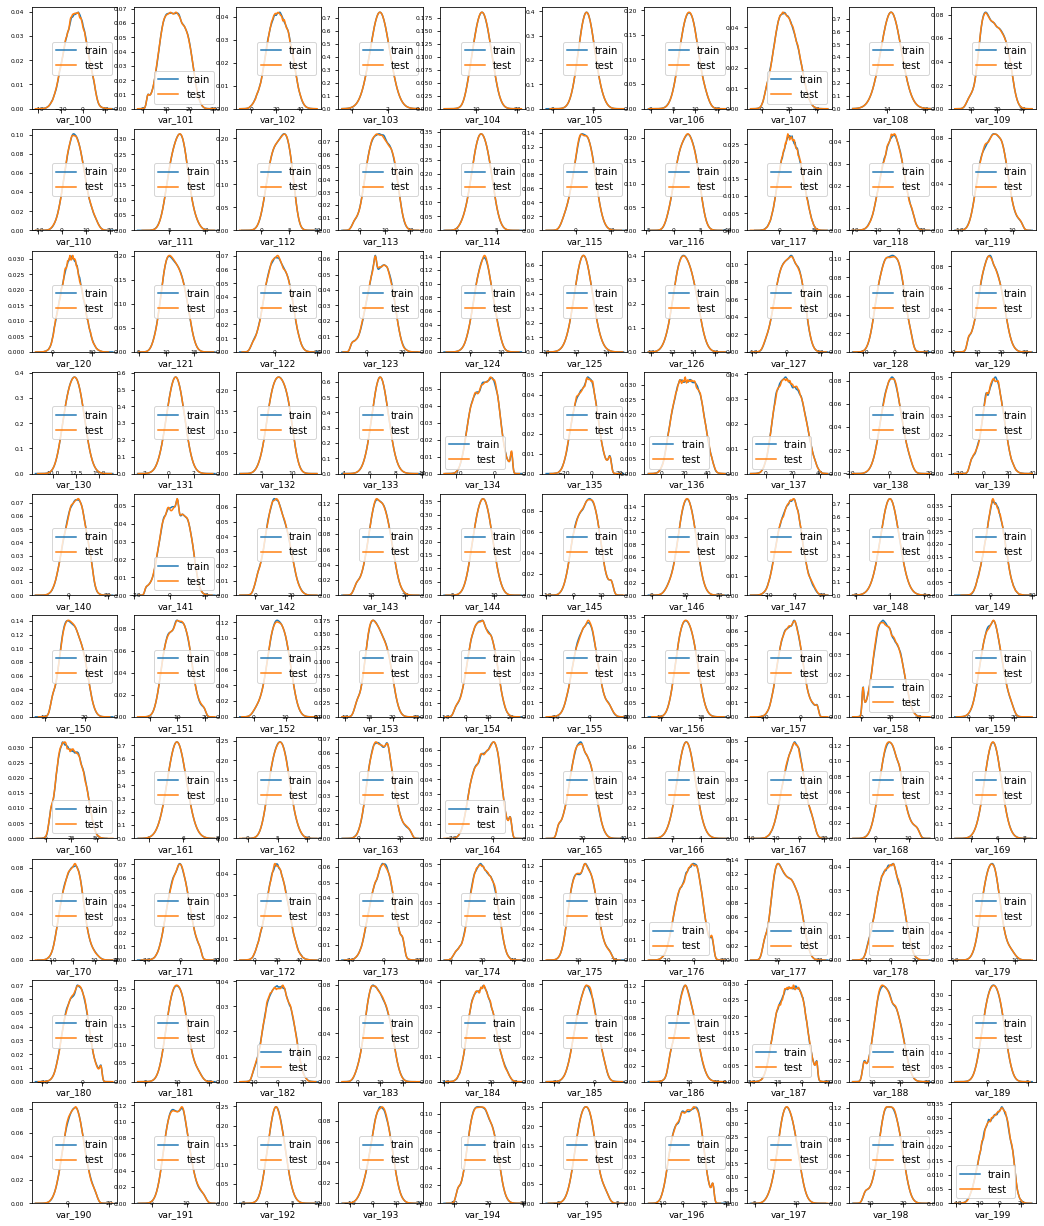

In [14]:
features = df.columns.values[102:202]
Plot_feature_distribution(df,df_test,"train","test",features)

### We can see that all the 200 Numerical variable is Normally distributed 

#### Distribution of mean and std¶

Let's check the distribution of the mean values per row in the train and test set.
 

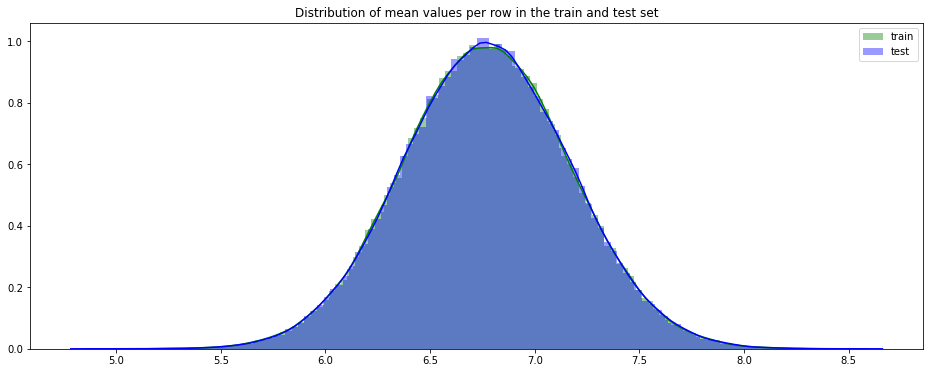

In [15]:
plt.figure(figsize=(16,6))
features = df.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(df[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(df_test[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

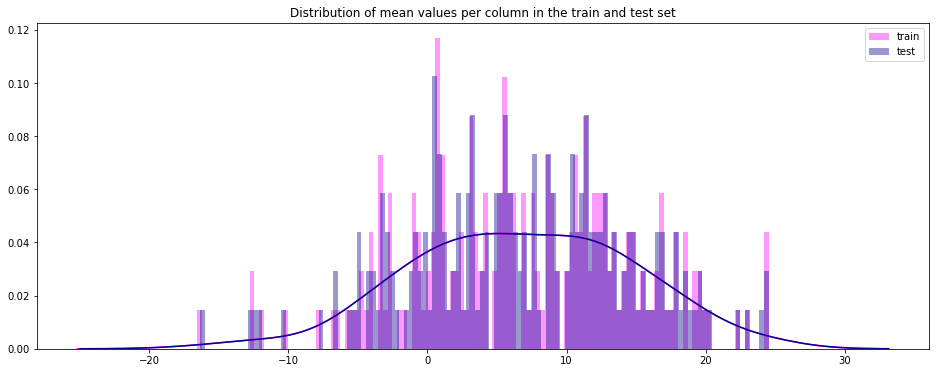

In [16]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(df[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(df_test[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

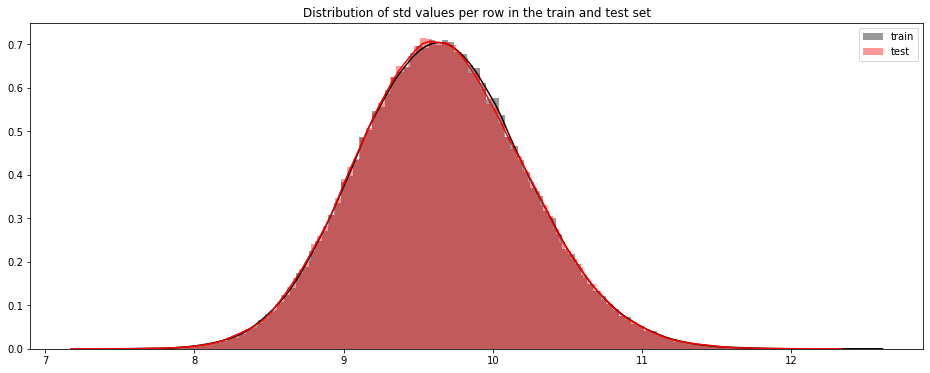

In [17]:

plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(df[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(df_test[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()



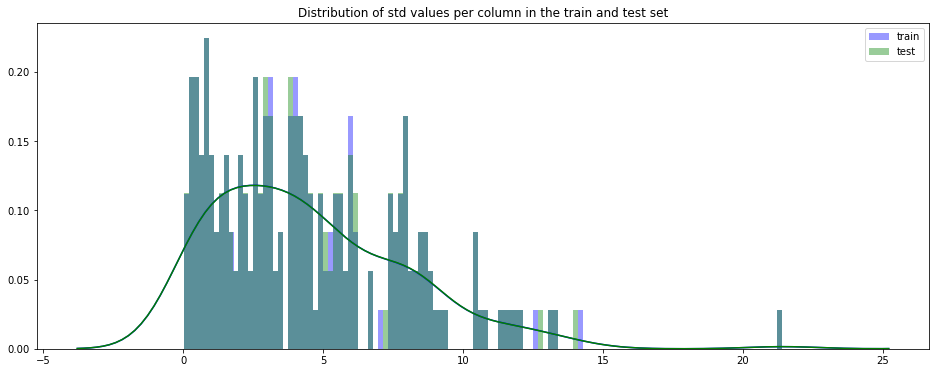

In [18]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(df[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(df_test[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend()
plt.show()

Observations:
    Mean values are distributed over a large range
    Standard deviation is relatively large for both train and test variable data

<AxesSubplot:xlabel='target', ylabel='count'>

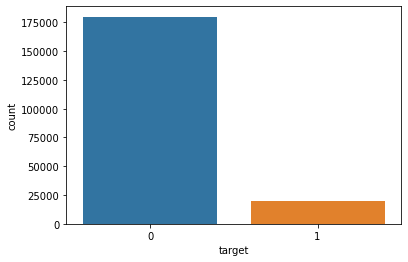

In [19]:
# lets check the frequency of target varibale
#sns.set_style("whitegrid")
sns.countplot(x="target",data = df)

In [20]:
from collections import Counter
Counter(df['target']==1)

Counter({False: 179902, True: 20098})

In [21]:
print("Total 0's in dataset is :",df['target'].value_counts()[0],'(',((df['target'].value_counts()[0])/len(df['target']))*100,'%)')
print("Total 1's in dataset is :",df['target'].value_counts()[1],'(',((df['target'].value_counts()[1])/len(df['target']))*100,'%)')

Total 0's in dataset is : 179902 ( 89.95100000000001 %)
Total 1's in dataset is : 20098 ( 10.049 %)


In [22]:
len(df['target'])

200000

### We can see that the dataset is imbalanced as total datapoints are 200000 on which 1 is only 20098 and 0 is 179902 , so we will treat this furthur to make it balance dataset 

## Outlier Analysis :- 

In [23]:
n=10
# splitting the list every n elements:

chunks = [Numerical_features[x:x+n] for x in range (0,len(Numerical_features),n)]

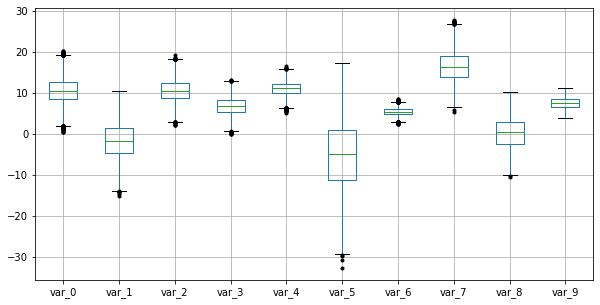

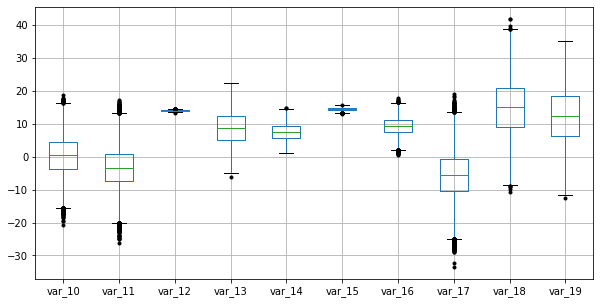

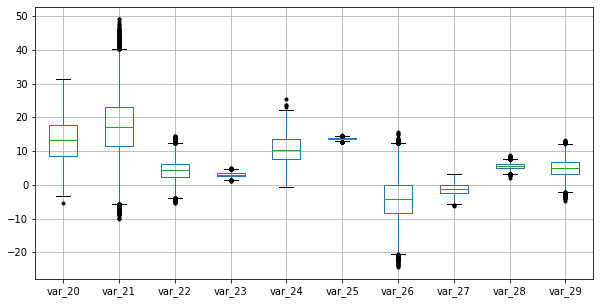

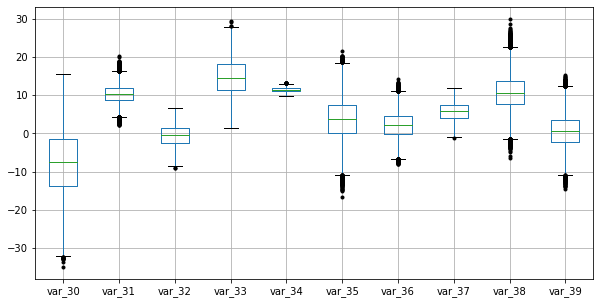

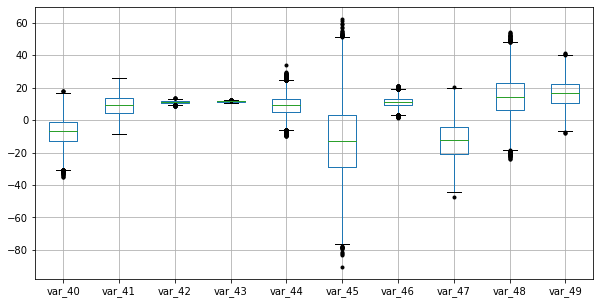

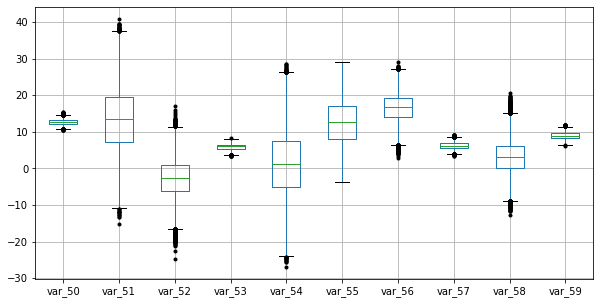

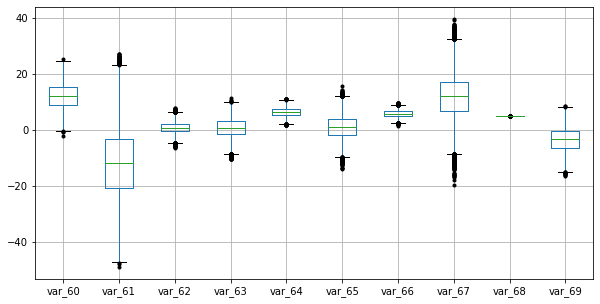

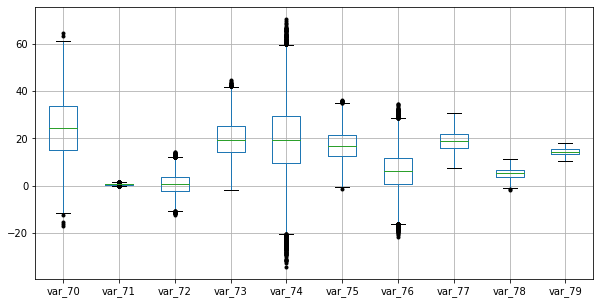

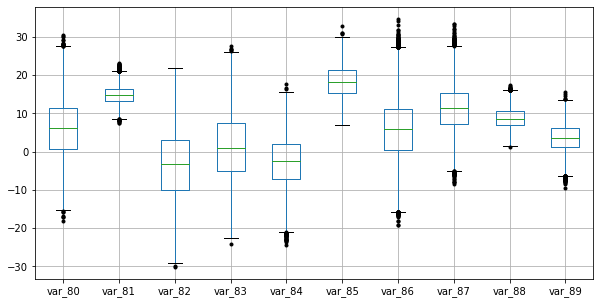

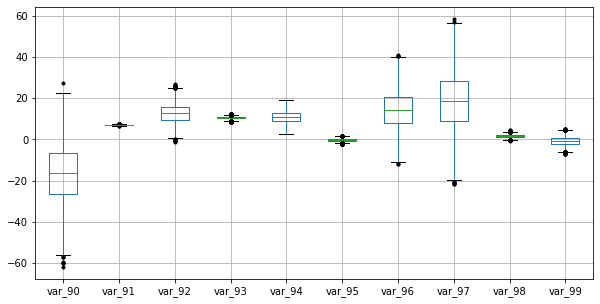

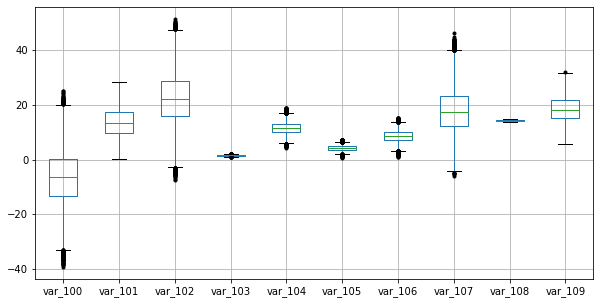

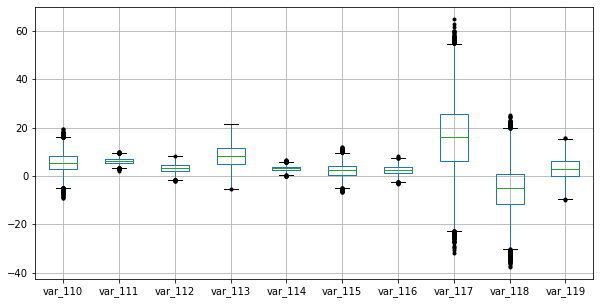

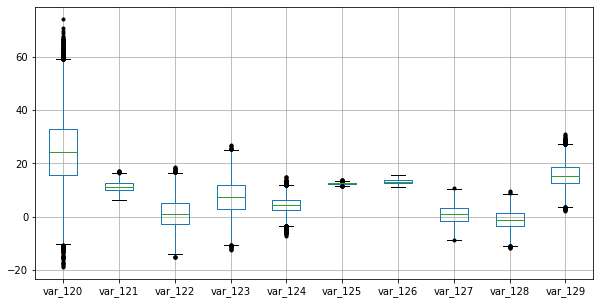

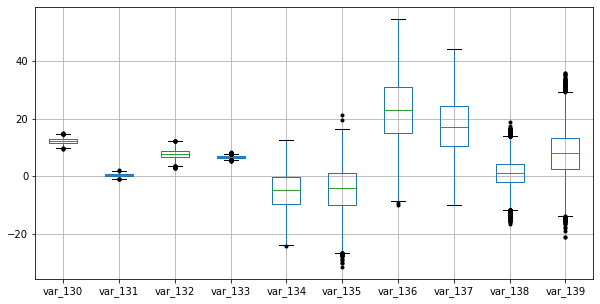

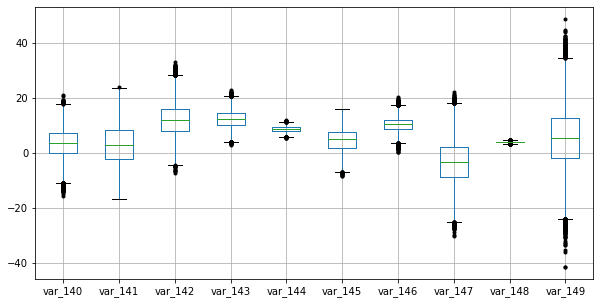

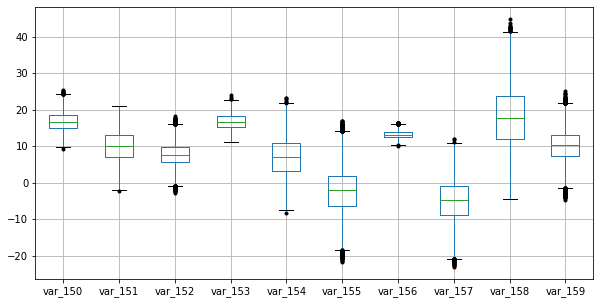

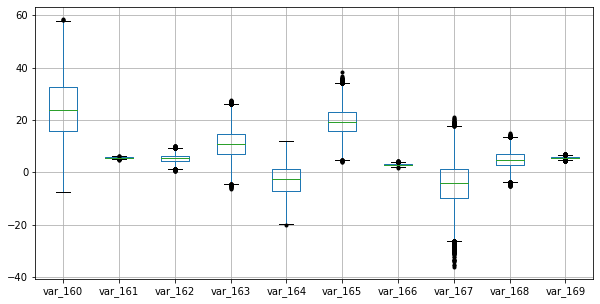

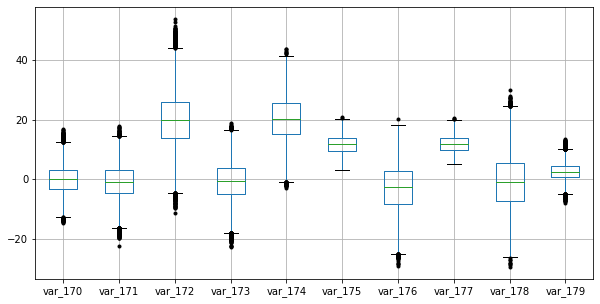

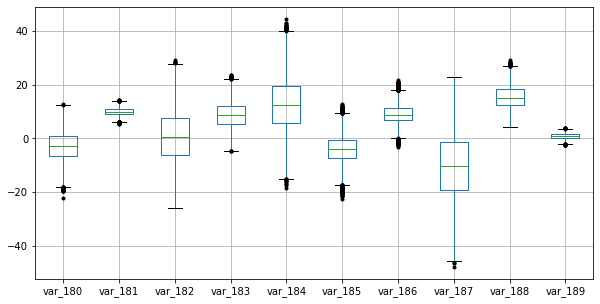

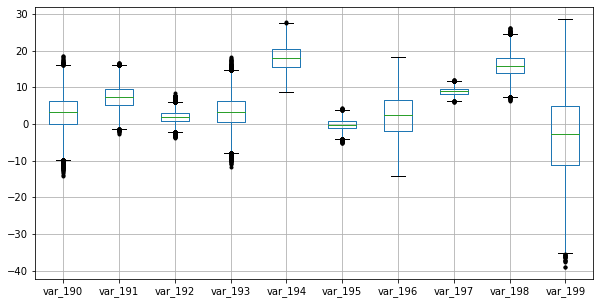

In [24]:
# displaying a boxplot every n columns:
for i in chunks:
    plt.show(df.boxplot(column = i, sym='k.', figsize=(10,5)))

#### From the above graph we can see that the feature are normally distributed but  we have outliers present in the features , so we need to treat them as well.

In [25]:
#Module to treat the outliers by using mean +- 3std
def Outlier_Treatment(df):
    for feature in Numerical_features:
        upper_boundary = df[feature].mean() + 3*df[feature].std()
        lower_boundary = df[feature].mean() - 3*df[feature].std()
        print(feature)
        print("Lower Boundary" ,lower_boundary)
        print("Upper Boundary" ,upper_boundary)
        print("Median of feature",df[feature].median())
        df.loc[df[feature]>upper_boundary,feature] =df[feature].median()
        df.loc[df[feature]<lower_boundary,feature] =df[feature].median()
        
        

In [26]:
Outlier_Treatment(df)

var_0
Lower Boundary 1.5597616399935301
Upper Boundary 19.800066864006467
Median of feature 10.524750000000001
var_1
Lower Boundary -13.77775425936499
Upper Boundary 10.52251088036499
Median of feature -1.60805
var_2
Lower Boundary 2.792509275600297
Upper Boundary 18.637874426399705
Median of feature 10.58
var_3
Lower Boundary 0.6665721079208184
Upper Boundary 12.926486206079183
Median of feature 6.825
var_4
Lower Boundary 6.2088846386894945
Upper Boundary 15.947781842310508
Median of feature 11.10825
var_5
Lower Boundary -28.655117543930164
Upper Boundary 18.524482556930163
Median of feature -4.83315
var_6
Lower Boundary 2.8091268828492963
Upper Boundary 8.008770480150703
Median of feature 5.3851
var_7
Lower Boundary 6.29162315268856
Upper Boundary 26.800076626311437
Median of feature 16.4568
var_8
Lower Boundary -9.71373876015274
Upper Boundary 10.28206246015274
Median of feature 0.3937
var_9
Lower Boundary 3.8620265856001863
Upper Boundary 11.272446137399811
Median of feature 7.6296

Median of feature 1.0697
var_84
Lower Boundary -21.26612522146482
Upper Boundary 16.08570770146482
Median of feature -2.51795
var_85
Lower Boundary 6.6371127078521255
Upper Boundary 30.088328581147863
Median of feature 18.29645
var_86
Lower Boundary -17.63236772178776
Upper Boundary 28.874484566787757
Median of feature 6.0067
var_87
Lower Boundary -5.634117929363029
Upper Boundary 28.337084320363033
Median of feature 11.288
var_88
Lower Boundary 1.2285434142656246
Upper Boundary 16.17730362873437
Median of feature 8.6162
var_89
Lower Boundary -6.956452614234626
Upper Boundary 14.406868469234626
Median of feature 3.64255
var_90
Lower Boundary -56.00657562077773
Upper Boundary 22.910281572777727
Median of feature -16.4826
var_91
Lower Boundary 6.529619484264635
Upper Boundary 7.445463454735365
Median of feature 6.9865
var_92
Lower Boundary 0.18082363385665623
Upper Boundary 25.298333252143344
Median of feature 12.6735
var_93
Lower Boundary 8.926716554490048
Upper Boundary 12.186763119509

var_166
Lower Boundary 1.854281618605587
Upper Boundary 4.072388520394414
Median of feature 2.9602
var_167
Lower Boundary -27.545214876887847
Upper Boundary 19.242905811887844
Median of feature -4.0116
var_168
Lower Boundary -4.380834241002831
Upper Boundary 14.25508217200283
Median of feature 4.7616
var_169
Lower Boundary 4.5276976008245775
Upper Boundary 6.744319089175422
Median of feature 5.6343
var_170
Lower Boundary -13.278824554658819
Upper Boundary 13.268900433658818
Median of feature 0.0028
var_171
Lower Boundary -16.96580202329744
Upper Boundary 15.302248836297439
Median of feature -0.80735
var_172
Lower Boundary -6.2054180741289
Upper Boundary 45.839605724128894
Median of feature 19.747999999999998
var_173
Lower Boundary -18.577989408089678
Upper Boundary 17.222055403089676
Median of feature -0.56975
var_174
Lower Boundary -1.198603036198275
Upper Boundary 41.619956612198266
Median of feature 20.2061
var_175
Lower Boundary 2.9641111517032055
Upper Boundary 20.317114187296802


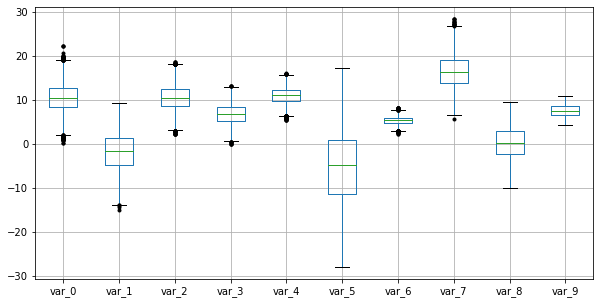

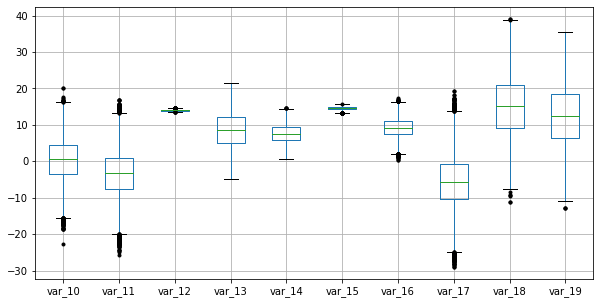

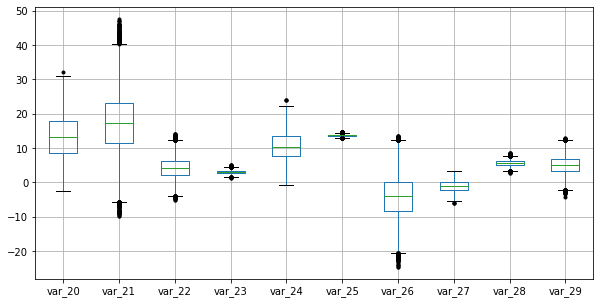

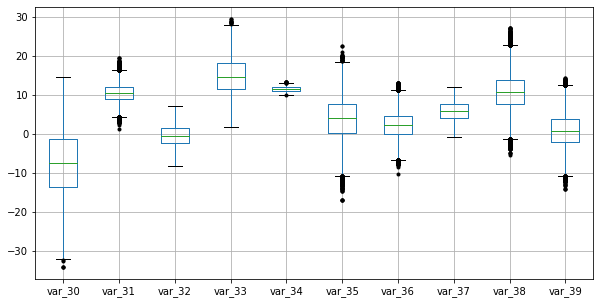

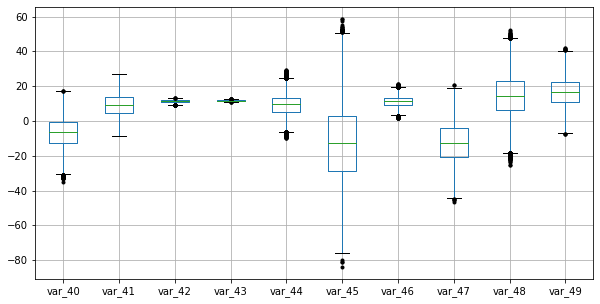

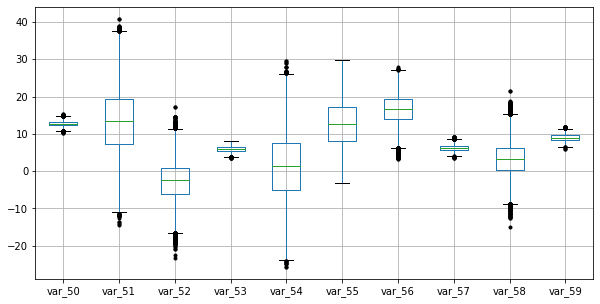

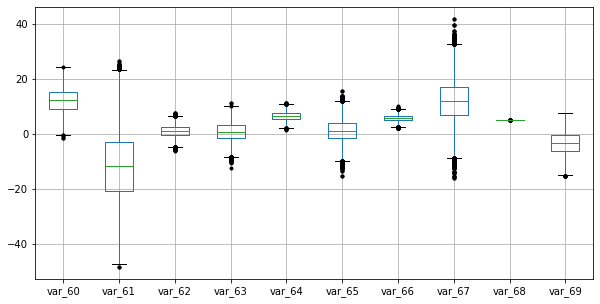

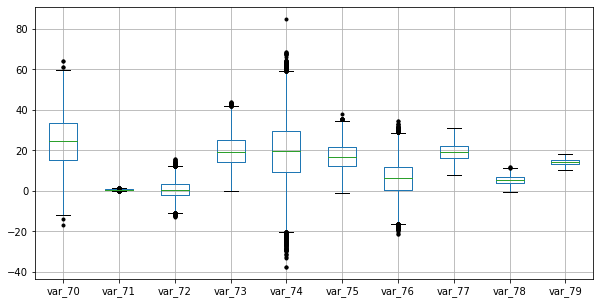

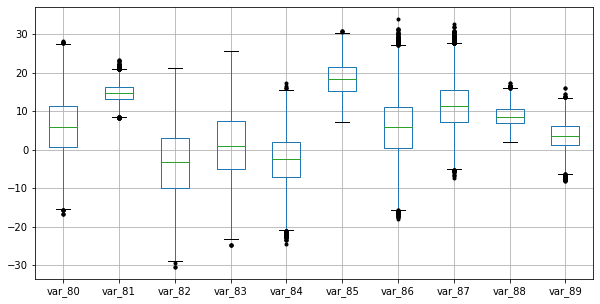

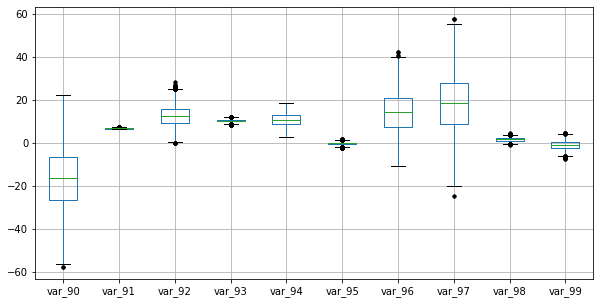

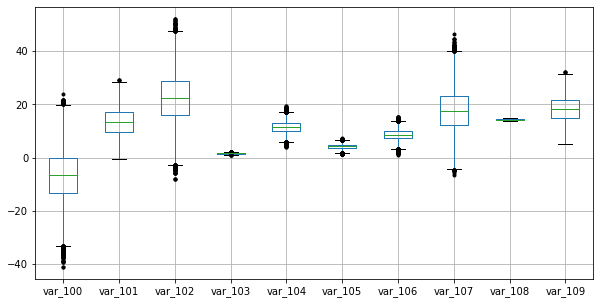

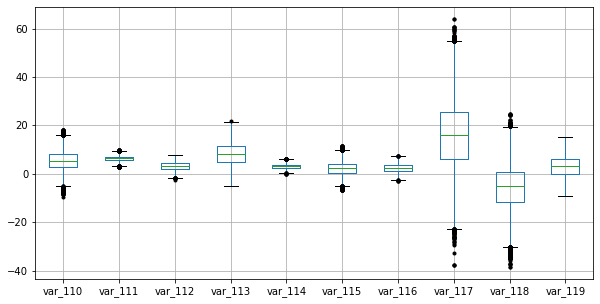

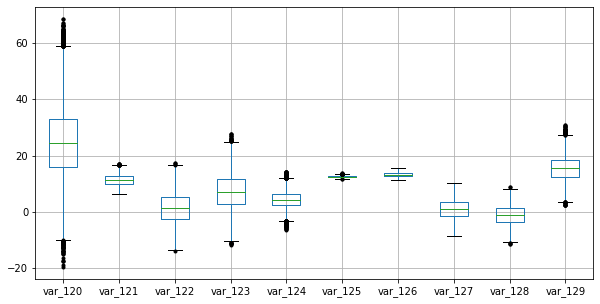

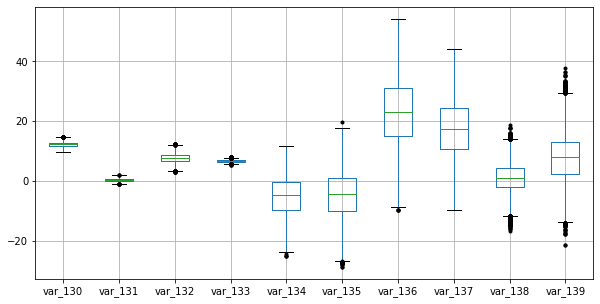

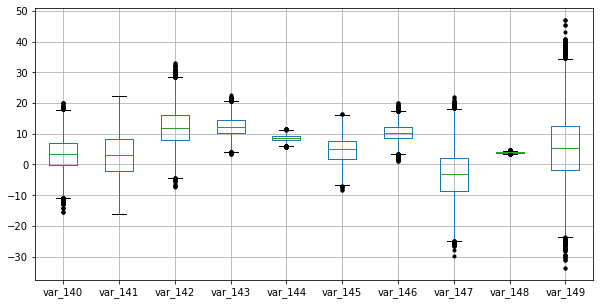

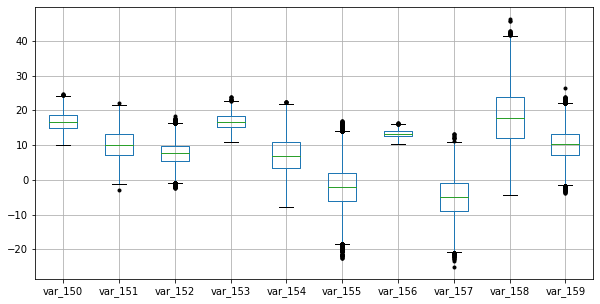

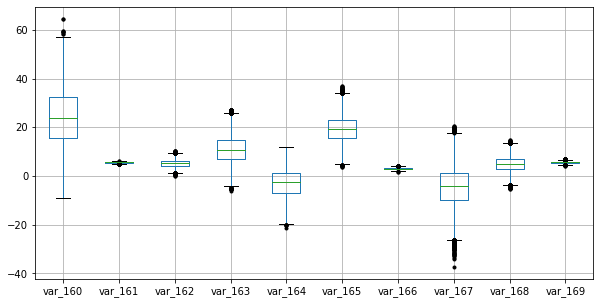

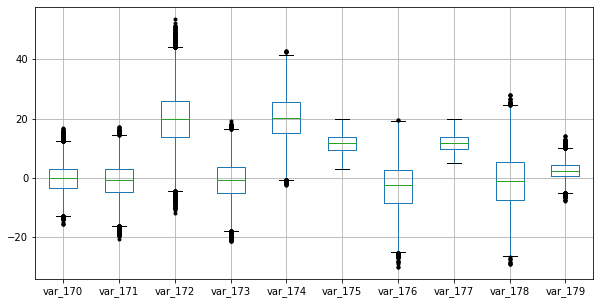

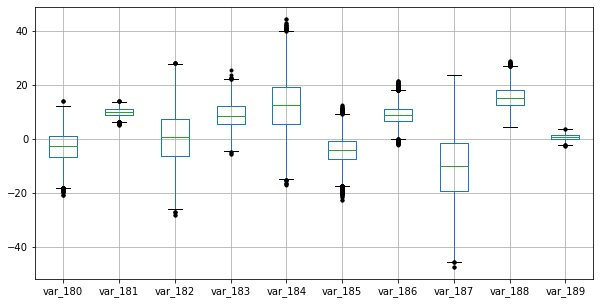

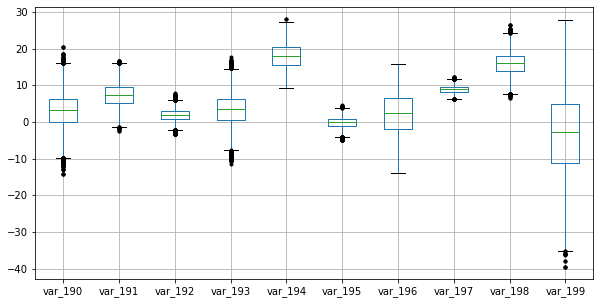

In [27]:
# displaying a boxplot for test dataset every n columns:
for i in chunks:
    plt.show(df_test.boxplot(column = i, sym='k.', figsize=(10,5)))

In [28]:
Outlier_Treatment(df_test)

var_0
Lower Boundary 1.5485903640402938
Upper Boundary 19.768883848959703
Median of feature 10.5138
var_1
Lower Boundary -13.74577121540311
Upper Boundary 10.497283655403109
Median of feature -1.5905
var_2
Lower Boundary 2.805786616122651
Upper Boundary 18.609117342877354
Median of feature 10.5607
var_3
Lower Boundary 0.6300429302555086
Upper Boundary 12.946384886744493
Median of feature 6.82235
var_4
Lower Boundary 6.22703052692507
Upper Boundary 15.925767739074931
Median of feature 11.09975
var_5
Lower Boundary -28.658436760114775
Upper Boundary 18.557321302114772
Median of feature -4.8341
var_6
Lower Boundary 2.821105717581697
Upper Boundary 8.0092225074183
Median of feature 5.3916
var_7
Lower Boundary 6.2556972906574195
Upper Boundary 26.80258818434258
Median of feature 16.4227
var_8
Lower Boundary -9.722989974828884
Upper Boundary 10.277259626828883
Median of feature 0.37200000000000005
var_9
Lower Boundary 3.8738110385857714
Upper Boundary 11.265003877414232
Median of feature 7.6

var_82
Lower Boundary -28.7050190517423
Upper Boundary 21.852621341742303
Median of feature -3.2257
var_83
Lower Boundary -23.730248439895778
Upper Boundary 25.773272887895775
Median of feature 1.01335
var_84
Lower Boundary -21.251659833777598
Upper Boundary 16.1210981427776
Median of feature -2.4939
var_85
Lower Boundary 6.652206929709546
Upper Boundary 30.121232825290452
Median of feature 18.3278
var_86
Lower Boundary -17.650213127645458
Upper Boundary 28.92608257764546
Median of feature 6.0408
var_87
Lower Boundary -5.544777062489631
Upper Boundary 28.30401902148963
Median of feature 11.3385
var_88
Lower Boundary 1.2456017565338646
Upper Boundary 16.230495435466135
Median of feature 8.6396
var_89
Lower Boundary -6.945332048801398
Upper Boundary 14.402913602801398
Median of feature 3.6643
var_90
Lower Boundary -55.85947532191112
Upper Boundary 23.189523492911118
Median of feature -16.18835
var_91
Lower Boundary 6.528496096971858
Upper Boundary 7.4479327800281405
Median of feature 6.9

var_164
Lower Boundary -19.23113808853376
Upper Boundary 13.516482038533761
Median of feature -2.6185
var_165
Lower Boundary 4.202850989938163
Upper Boundary 34.438669889061835
Median of feature 19.2903
var_166
Lower Boundary 1.8508168116457944
Upper Boundary 4.074825293354206
Median of feature 2.9611
var_167
Lower Boundary -27.67141822595017
Upper Boundary 19.293151996950172
Median of feature -4.08055
var_168
Lower Boundary -4.328974441486188
Upper Boundary 14.189686347486187
Median of feature 4.7493
var_169
Lower Boundary 4.536466215806065
Upper Boundary 6.730964962193934
Median of feature 5.6328
var_170
Lower Boundary -13.274450438974622
Upper Boundary 13.232803252974623
Median of feature 0.008
var_171
Lower Boundary -16.94062519597638
Upper Boundary 15.33032973797638
Median of feature -0.7827999999999999
var_172
Lower Boundary -6.254543889788035
Upper Boundary 45.81359933778802
Median of feature 19.723750000000003
var_173
Lower Boundary -18.628498714347423
Upper Boundary 17.2960178

## Feature Selection 

<AxesSubplot:>

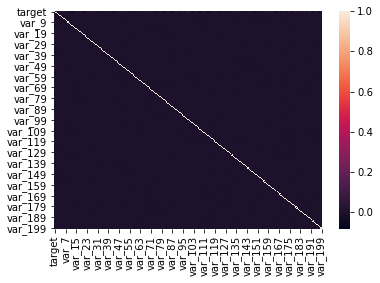

In [29]:
#Heatmap to see the correcations in between the variables
sns.heatmap(df.corr())

In [30]:
#correlation between the independent varibale and arrnging in assendig order.
correlations = df[Numerical_features].corr().abs().unstack().sort_values(kind = "quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]


In [31]:
correlations.head(10)

,level_0,level_1,0
0,var_165,var_52,1.110721e-07
1,var_52,var_165,1.110721e-07
2,var_125,var_145,1.135424e-07
3,var_145,var_125,1.135424e-07
4,var_47,var_130,3.214634e-07
5,var_130,var_47,3.214634e-07
6,var_102,var_90,6.874008e-07
7,var_90,var_102,6.874008e-07
8,var_102,var_17,6.904914e-07
9,var_17,var_102,6.904914e-07


In [32]:
correlations.tail(10)

,level_0,level_1,0
39790,var_189,var_183,0.009309
39791,var_183,var_189,0.009309
39792,var_174,var_81,0.009532
39793,var_81,var_174,0.009532
39794,var_53,var_148,0.009766
39795,var_148,var_53,0.009766
39796,var_165,var_81,0.009792
39797,var_81,var_165,0.009792
39798,var_139,var_26,0.009855
39799,var_26,var_139,0.009855




Observation: Its visible that correlation between train attributes is very small. Ranges between 0.001 to 0.009


In [33]:
correlations_test = df_test[Numerical_features].corr().abs().unstack().sort_values(kind = "quicksort").reset_index()
correlations_test = correlations_test[correlations_test['level_0'] != correlations_test['level_1']]


In [34]:
correlations_test.head(10)

,level_0,level_1,0
0,var_154,var_124,1.729263e-07
1,var_124,var_154,1.729263e-07
2,var_25,var_145,6.958119e-07
3,var_145,var_25,6.958119e-07
4,var_103,var_25,1.255083e-06
5,var_25,var_103,1.255083e-06
6,var_134,var_139,1.502275e-06
7,var_139,var_134,1.502275e-06
8,var_151,var_9,1.529436e-06
9,var_9,var_151,1.529436e-06


In [35]:
correlations_test.tail(10)

,level_0,level_1,0
39790,var_163,var_40,0.008538
39791,var_40,var_163,0.008538
39792,var_122,var_164,0.008555
39793,var_164,var_122,0.008555
39794,var_143,var_96,0.008784
39795,var_96,var_143,0.008784
39796,var_132,var_31,0.009076
39797,var_31,var_132,0.009076
39798,var_75,var_139,0.009729
39799,var_139,var_75,0.009729


Observation: Its visible that correlation between test attributes is very small. Ranges between 0.001 to 0.009


### DIMENSIONALITY REDUCTION

Using Principal Component Analysis(PCA)

In [36]:
X_train_data = df.iloc[:,2:202]
Y_train_data = df['target']

In [37]:
print('Shape of X train data is :',X_train_data.shape)
print('Shape of Y train data is :',Y_train_data.shape)

Shape of X train data is : (200000, 200)
Shape of Y train data is : (200000,)


In [38]:
# Data-preprocessing: Standardizing the data
standardized_data = StandardScaler().fit_transform(X_train_data)

In [39]:
# initializing the pca
pca= decomposition.PCA()

In [41]:
# configuring the parameteres
# the number of components = 2
pca.n_components= 2
pca_data =pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (200000, 2)


In [42]:
# attaching the label for each 2-d data point 
pca_data= np.vstack((pca_data.T,Y_train_data)).T

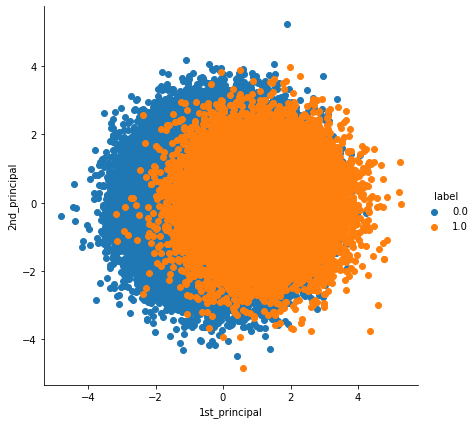

In [43]:
# creating a new data frame which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


    Here, we clearly see that both the targets(0's & 1's) are overlapping.
    Both the classes are not linearly separable.
    we find that observations of different class labels are not well separated, indicating that classification cannot be implemented on low-dimensional space.



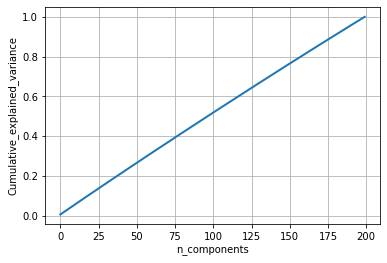

In [44]:
# PCA for dimensionality reduction (non-visualization)
pca.n_components = 200
pca_data = pca.fit_transform(standardized_data)
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

#Plot the PCA spectrum
plt.figure(1, figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained, linewidth =2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()



    1. Here we have used PCA for feature importance.
    2. We can clearly see that we are getting a straight line which means there is a linear relationship between no. of components and cumulative explained variance.
    3. 100% of the cumulative explained variance is explained by all the 200 dimensions only.
    4. That's why we are considering all the 200 dimensions.



In [45]:
model=ExtraTreesClassifier()
model.fit(X_train_data,Y_train_data)

ExtraTreesClassifier()

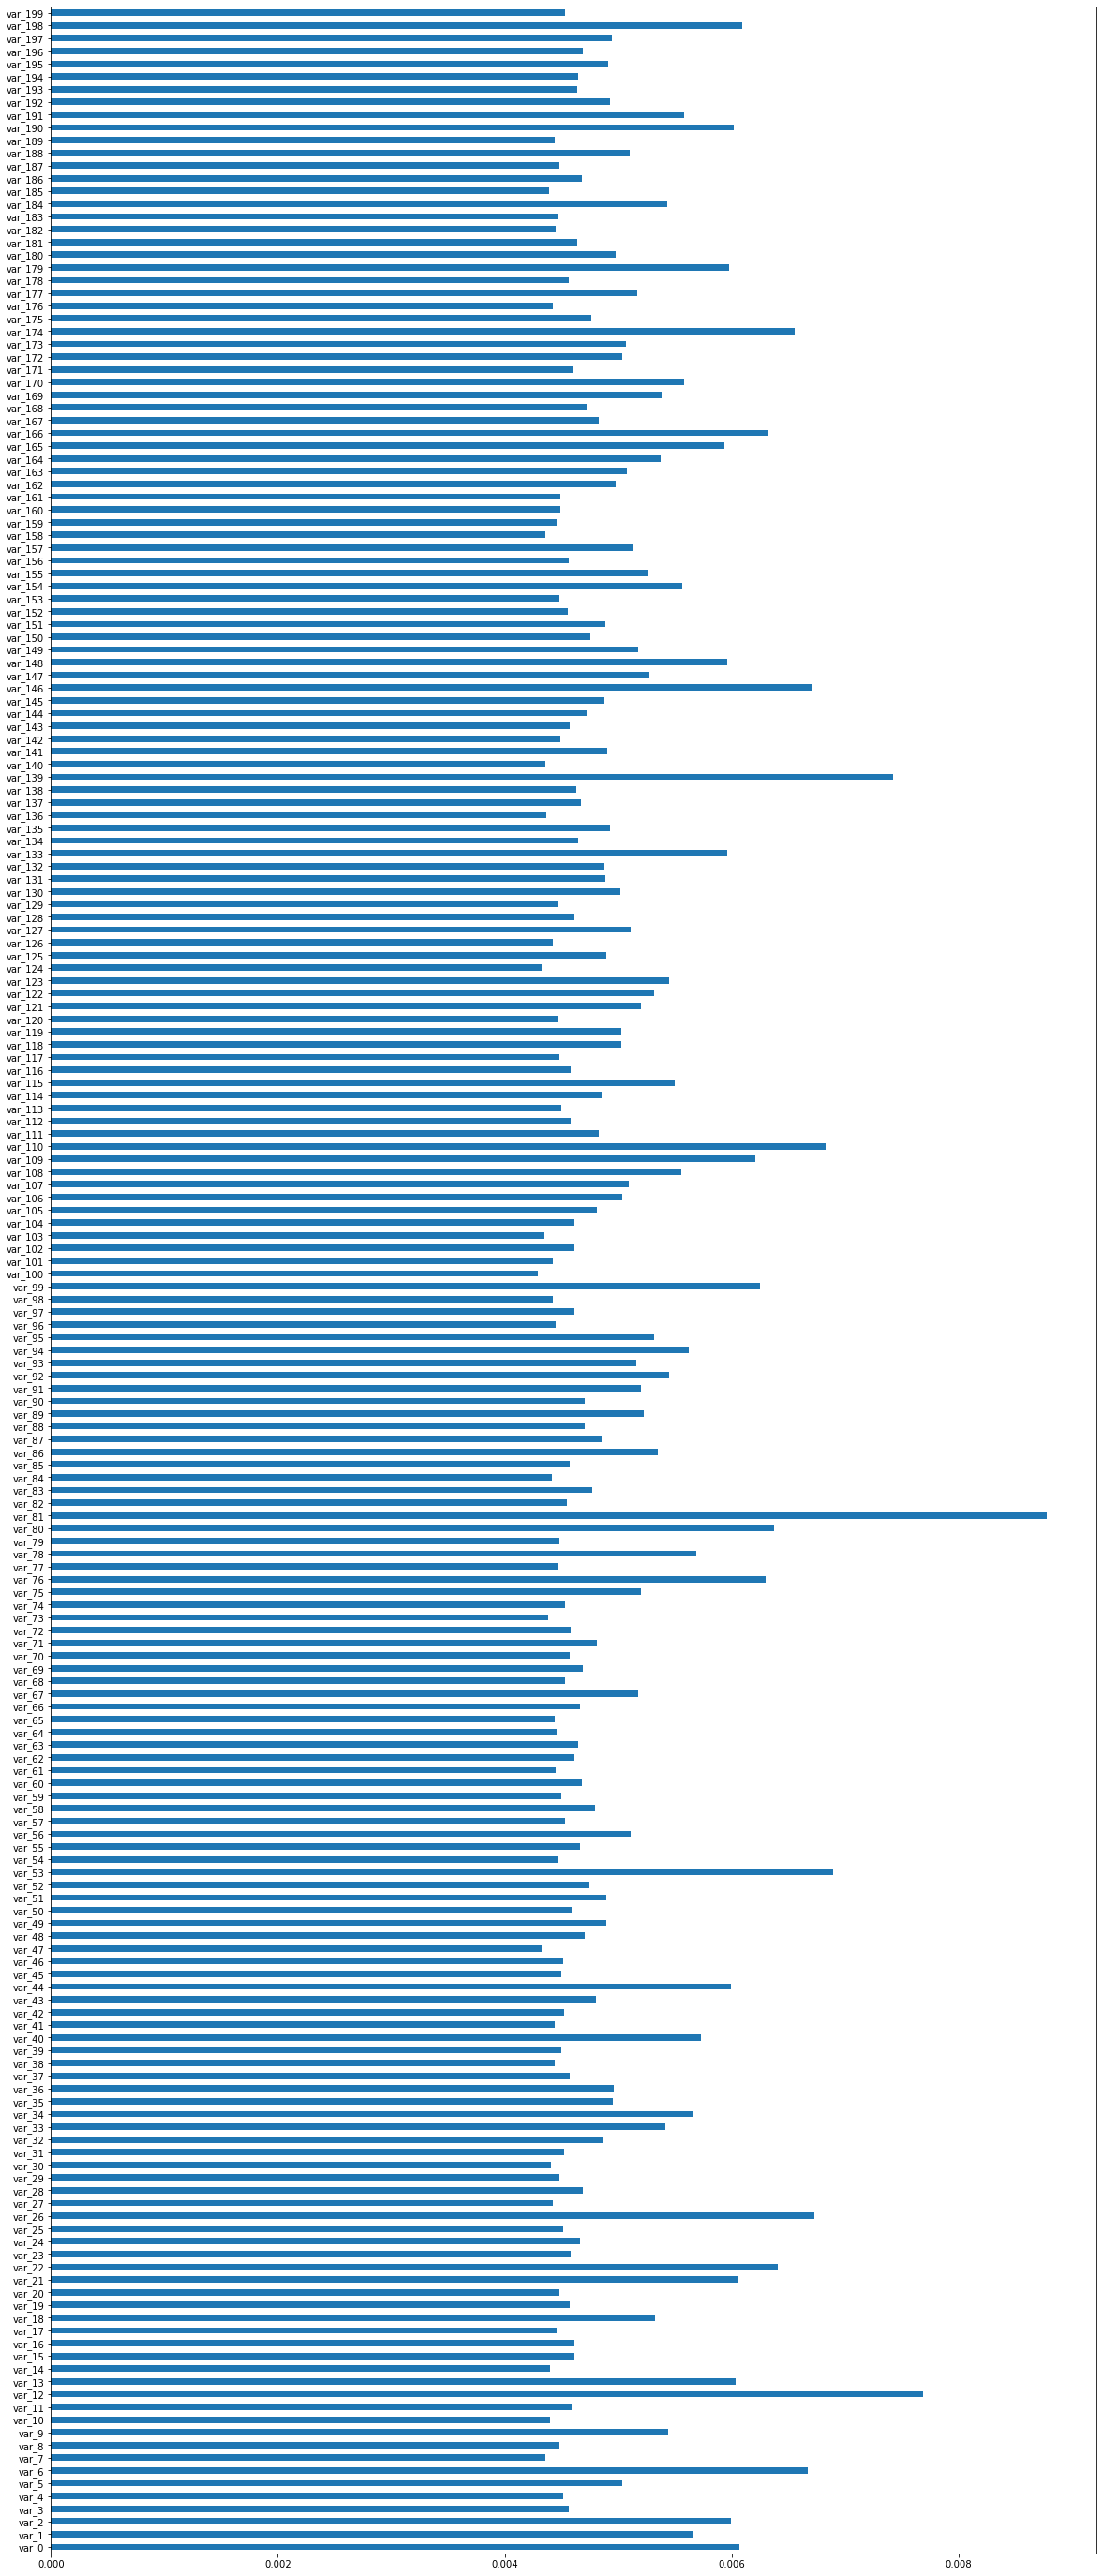

In [46]:
ranked_features=pd.Series(model.feature_importances_,index=X_train_data.columns)
plt.figure(figsize=(20,50))
ranked_features.plot(kind='barh')
plt.show()

## Modeling

In [47]:
#Spliting the data via Sratified KFold Cross Validator:-
X= df.drop(['target','ID_code'],axis=1)
Y=df['target']

#Stratified KFold Cross Validator:-

skf = StratifiedKFold(n_splits=5, random_state=None)
for train_index, test_index in skf.split(X,Y): 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    

#### Logistic Regression 

In [48]:
%%time
logit = LogisticRegression(solver='saga',max_iter= 400)
logit.fit(X_train,y_train)

Wall time: 6min 21s


LogisticRegression(max_iter=400, solver='saga')

In [49]:
logit_score = logit.score(X_train,y_train)
print("The accuracy of Logit is", logit_score)

The accuracy of Logit is 0.913975


In [51]:
%%time
#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(logit,X_test,y_test,cv=5)
#Cross validation score-
cv_score=cross_val_score(logit,X_test,y_test,cv=5)
print('cross val score :',np.average(cv_score))

cross val score : 0.913575
Wall time: 12min 52s


Accuracy of the model is not the best metric to use for classification problems while evaluating the imbalanced datasets as it may be misleading. We are going to change the performance metric.



#### Confusion Matrix:-

In [52]:
cm = confusion_matrix(y_test,cv_predict)
cm = pd.crosstab(y_test,cv_predict)
cm

col_0,0,1
target,,
0,35460,520
1,2937,1083


In [53]:
#ROC_AUC SCORE:-
roc_score = roc_auc_score(y_test,cv_predict)
print("ROC score ", roc_score)

ROC score  0.6274752557390922


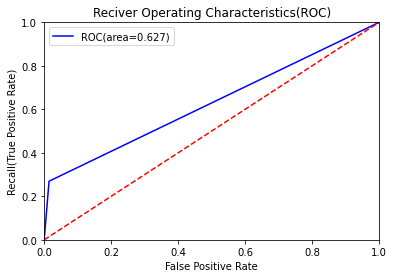

AUC: 0.6274752557390922


In [54]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate, recall,thresholds = roc_curve(y_test,cv_predict)
roc_auc = auc(false_positive_rate,recall)
plt.title("Reciver Operating Characteristics(ROC)")
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

There is  big difference between roc_auc_score and model accuracy, model is not performing well on imbalanced data.

In [55]:
#Classification report:-
classification_score = classification_report(y_test,cv_predict)
print(classification_score)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.68      0.27      0.39      4020

    accuracy                           0.91     40000
   macro avg       0.80      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000



Observation:- As we see that f1 score is high for the customers who will not make a transaction, compare to those who will make a transaction. So, we are going to make the dataset balanced first and try to apply different algoriths



#### Oversample Minority Class:-

-Adding more copies of minority class.
-It can be a good option we dont have that much large data to work.
-Drawback of this process is we are adding info. That can lead to overfitting or poor performance on test data.

#### Undersample Mojorityclass:-

-Removing some copies of majority class.
-It can be a good option if we have very large amount of data say in millions to work.
-Drawback of this process is we are removing some valuable info. that can leads to underfitting & poor performance on        test data.

As per the drawbacks of both the model we will use SMOTE ( Synthetic Minority Oversampling technique) that is more best than the above as compare to above one's.

#### SMOTE 
( Synthetic Minority Oversampling technique):- This is a statistical technique for increasing the number of cases in your dataset in a balanced way. It uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.


In [56]:
%%time
#smote
sm = SMOTE(random_state= 42)
#Generating synthetic data points
X_smote,y_smote = sm.fit_sample(X_train,y_train)
X_smote_test,y_smote_test =sm.fit_sample(X_test,y_test)
print("The number of classes before fit for train {}".format(Counter(y_train)))
print("The number of classes after fit for train {}".format(Counter(y_smote)))
print("The number of classes before fit for test {}".format(Counter(y_test)))
print("The number of classes after fit for test {}".format(Counter(y_smote_test)))

The number of classes before fit for train Counter({0: 143922, 1: 16078})
The number of classes after fit for train Counter({0: 143922, 1: 143922})
The number of classes before fit for test Counter({0: 35980, 1: 4020})
The number of classes after fit for test Counter({0: 35980, 1: 35980})
Wall time: 5min 46s


#### Now the dataset looks balanced 

### Logistsic regression model after SMOTE:- 

In [57]:
#Logistic regression model for SMOTE:-
logit_smote = LogisticRegression()
logit_smote.fit(X_smote,y_smote)

LogisticRegression()

In [58]:
smote_score = logit_smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

Accuracy of the smote_model : 0.7909492641847667


In [59]:
%%time
#Cross validation prediction for SMOTE:-
cv_pred = cross_val_predict(logit_smote,X_smote_test,y_smote_test,cv=5)
#Cross validation score:-
cv_score =  cross_val_score(logit_smote,X_smote_test,y_smote_test,cv=5)
print('Cross validation score :',np.average(cv_score))

Cross validation score : 0.7931211784324625
Wall time: 30.3 s


In [60]:
#Confusion matrix:-
cm = confusion_matrix(y_smote_test,cv_pred)
cm= pd.crosstab(y_smote_test,cv_pred)
cm

col_0,0,1
target,,
0,28134,7846
1,7041,28939


In [61]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_smote_test,cv_pred)
print('ROC score:',roc_score)



ROC score: 0.7931211784324625


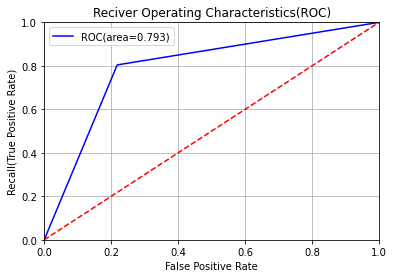

AUC: 0.7931211784324625


In [62]:
#ROC_AUC Curve:-
plt.figure(1, figsize=(6, 4))
false_positive_rate,recall,thresholds=roc_curve(y_smote_test,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()
print('AUC:',roc_auc)




#### Classification Report:-


In [63]:
classification_scores = classification_report(y_smote_test,cv_pred)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35980
           1       0.79      0.80      0.80     35980

    accuracy                           0.79     71960
   macro avg       0.79      0.79      0.79     71960
weighted avg       0.79      0.79      0.79     71960



Now we can see that f1 score is high for the customers who will not make a transaction, as well as who will make a transaction.

#### Random forest 

In [64]:
%%time
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=5,random_state=25,return_train_score=True)

rf_random.fit(X_train,y_train)

Wall time: 22min 24s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DD142597B8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DD14265BE0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DD1662E898>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DD15BCAD68>},
                   random_state=25, return_train_score=True)

In [65]:
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.8995125 0.8995125 0.8995125 0.8995125 0.8995125]
mean train scores [0.8995125 0.8995125 0.8995125 0.8995125 0.8995125]


In [66]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=51, min_samples_split=125,
                       n_estimators=117, n_jobs=-1, random_state=25)


In [67]:
print(rf_random.best_params_)

{'max_depth': 14, 'min_samples_leaf': 51, 'min_samples_split': 125, 'n_estimators': 117}


In [68]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [69]:
%%time
rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=51, min_samples_split=125,
                       min_weight_fraction_leaf=0.0, n_estimators=117,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

rf_clf.fit(X_train,y_train)
rf_y_train_pred = rf_clf.predict(X_train)
rf_y_test_pred = rf_clf.predict(X_test)

Wall time: 1min 9s


In [72]:

print("="*100)
accuracy_rf_test = accuracy_score(y_test,rf_y_test_pred)
print('Test accuracy score :',accuracy_rf_test)


print("="*100)
roc_rf_train = roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:,1] )
roc_rf_test = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1] )
print("AUC score on train data :",roc_rf_train)
print("AUC score on test data :",roc_rf_test)

Test accuracy score : 0.8995
AUC score on train data : 0.8945333551748554
AUC score on test data : 0.8276733757560171


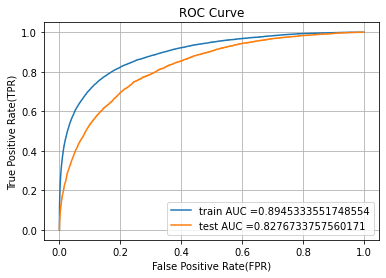

In [73]:

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
rf_y_train_pred = rf_clf.predict_proba(X_train)[:,1] 
rf_y_test_pred = rf_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, rf_y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, rf_y_test_pred)

plt.figure(1, figsize=(6, 4))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()



In [74]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(rf_y_test_pred, te_thresholds, test_fpr, test_tpr)))
print("="*100)

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.5660413883887953 for threshold 0.116
[[27200  8780]
 [ 1010  3010]]


#### Light Gradient Boost 

In [75]:
%%time
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = lgb.LGBMClassifier(random_state=25,n_jobs=-1)

lgb_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,random_state=25,return_train_score=True)

lgb_random.fit(X_train,y_train)

Wall time: 12min 45s


RandomizedSearchCV(cv=10, estimator=LGBMClassifier(random_state=25), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DD14B523C8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DD14A917F0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DD14A910B8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DD14B77588>},
                   random_state=25, return_train_score=True)

In [76]:
print('mean test scores:',lgb_random.cv_results_['mean_test_score'])
print('mean train scores:',lgb_random.cv_results_['mean_train_score'])

mean test scores: [0.90949375 0.90854375 0.90804375 0.90865625 0.90993125]
mean train scores: [0.92151944 0.91969167 0.91901806 0.91932778 0.92248889]


In [77]:
lgb_random_best_estimator = lgb_random.best_estimator_
print(lgb_random_best_estimator)

LGBMClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
               n_estimators=121, random_state=25)


In [78]:
lgb_random_best_params = lgb_random.best_params_
print(lgb_random_best_params)

{'max_depth': 14, 'min_samples_leaf': 28, 'min_samples_split': 111, 'n_estimators': 121}


In [79]:
%%time
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=14,
               min_child_samples=20, min_child_weight=0.001,
               min_samples_leaf=28, min_samples_split=111, min_split_gain=0.0,
               n_estimators=121, n_jobs=-1, num_leaves=31, objective=None,
               random_state=25, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

lgb_clf.fit(X_train,y_train)
lgb_y_train_pred = lgb_clf.predict(X_train)
lgb_y_test_pred = lgb_clf.predict(X_test)

print("="*100)
f1_lgb_train=f1_score(y_train,lgb_y_train_pred)
f1_lgb_test=f1_score(y_test,lgb_y_test_pred)
print('Train f1 score : ',f1_lgb_train)
print('Test f1 score : ',f1_lgb_test)
print("="*100)
accuracy_rf_test = accuracy_score(y_test,lgb_y_test_pred)
print('Test accuracy score :',accuracy_rf_test)

print("="*100)
roc_lgb_train = roc_auc_score(y_train, lgb_clf.predict_proba(X_train)[:,1] )
roc_lgb_test = roc_auc_score(y_test, lgb_clf.predict_proba(X_test)[:,1] )
print("AUC score on train data :",roc_lgb_train)
print("AUC score on test data :",roc_lgb_test)

Train f1 score :  0.36315046389673256
Test f1 score :  0.22313691507798958
Test accuracy score : 0.91035
AUC score on train data : 0.9336204019329974
AUC score on test data : 0.8746596160387612
Wall time: 18.9 s


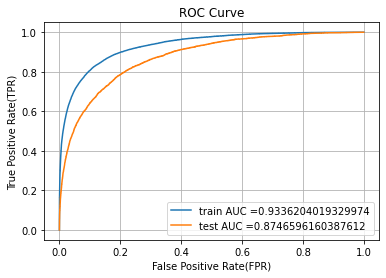

In [80]:
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
lgb_y_train_pred = lgb_clf.predict_proba(X_train)[:,1] 
lgb_y_test_pred = lgb_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, lgb_y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, lgb_y_test_pred)

plt.figure(1, figsize=(6, 4))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()



In [81]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(lgb_y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(lgb_y_test_pred, te_thresholds, test_fpr, test_tpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.7333914590393178 for threshold 0.13
[[122708  21214]
 [  2248  13830]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.6296992179181912 for threshold 0.12
[[29071  6909]
 [  887  3133]]


#### Model Selection 

In [126]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["sl.no", "model", "Accuracy", "AUC"]

x.add_row(["1", "LogisticRegresion",  0.791, 0.793])
x.add_row(["2", "RandomForestClassifier", 0.899, 0.827])
x.add_row(["3","LGBMClassifier",  0.911, 0.874])

print(x)



+-------+------------------------+----------+-------+
| sl.no |         model          | Accuracy |  AUC  |
+-------+------------------------+----------+-------+
|   1   |   LogisticRegresion    |  0.791   | 0.793 |
|   2   | RandomForestClassifier |  0.899   | 0.827 |
|   3   |     LGBMClassifier     |  0.911   | 0.874 |
+-------+------------------------+----------+-------+



OBSERVATIONS :

    Among all the three models, Light GB model performed best ,either in terms of f1 score or AUC score 
    
    So we will consider LGB model for predicting the label on test data.

Now we have tried 3 models among all Light GBM is best for this problem statement so we will apply this for our model development.

In [82]:
#Training data-
lgb_train=lgb.Dataset(X_train,label=y_train)

#Validation data-
lgb_test=lgb.Dataset(X_test,label=y_test)



In [84]:
#Selecting best hyperparameters by tuning of different parameters:-
params = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 1,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 8,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

In [85]:
#Training lgbm model:-
num_rounds=10000
lgbm= lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_test],verbose_eval=1000,early_stopping_rounds = 5000)
lgbm

Training until validation scores don't improve for 5000 rounds
[1000]	training's auc: 0.870831	valid_1's auc: 0.859831
[2000]	training's auc: 0.899956	valid_1's auc: 0.884114
[3000]	training's auc: 0.912861	valid_1's auc: 0.893401
[4000]	training's auc: 0.920855	valid_1's auc: 0.897634
[5000]	training's auc: 0.926323	valid_1's auc: 0.899636
[6000]	training's auc: 0.930799	valid_1's auc: 0.90044
[7000]	training's auc: 0.934878	valid_1's auc: 0.90096
[8000]	training's auc: 0.938866	valid_1's auc: 0.9009
[9000]	training's auc: 0.942638	valid_1's auc: 0.900891
[10000]	training's auc: 0.946282	valid_1's auc: 0.900795
Did not meet early stopping. Best iteration is:
[10000]	training's auc: 0.946282	valid_1's auc: 0.900795


In [128]:
lgbm_predict_prob_valid =lgbm.predict(X_test,random_state=42,num_iteration=lgbm.best_iteration)
valid_fpr, valid_tpr, valid_thresholds = roc_curve(y_test, lgbm_predict_prob_valid)

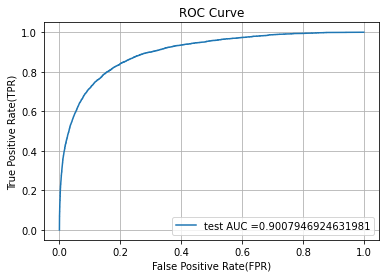

In [129]:
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

plt.figure(1, figsize=(6, 4))
plt.plot(valid_fpr, valid_tpr, label="test AUC ="+str(auc(valid_fpr, valid_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()



In [130]:
#Now we will check for the best threshold value
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in valid_thresholds:
    y_pred1 = np.where(lgbm_predict_prob_valid>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred1, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(valid_thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)

In [132]:
accuracy_ls

,thresholds,accuracy
739,0.480209,0.925600
736,0.480935,0.925575
740,0.480144,0.925575
738,0.480224,0.925575
737,0.480788,0.925575
...,...,...
4545,0.002228,0.151250
4546,0.002228,0.151225
4547,0.000445,0.103125
4548,0.000443,0.103100


Now we have the best Threshold value which is 0.48, we will use this threshold value.

In [134]:
X_test_final =df_test.drop(['ID_code'],axis=1)
#Predict the model:-

#probability predictions
lgbm_predict_prob=lgbm.predict(X_test_final,random_state=42,num_iteration=lgbm.best_iteration)

#Convert to binary output 1 or 0
lgbm_predict=np.where(lgbm_predict_prob>=0.48,1,0)
print(lgbm_predict_prob)
print(lgbm_predict)

[0.07265393 0.22130588 0.25619678 ... 0.00256938 0.074677   0.05222952]
[0 0 0 ... 0 0 0]


In [135]:
#Final submission:-
df_sub=pd.DataFrame({'ID_code':df_test['ID_code'].values})
df_sub['lgbm_predict_prob']=lgbm_predict_prob
df_sub['lgbm_predict']=lgbm_predict
df_sub.to_csv('Finalsubmission.csv',index=False)
df_sub.head()

,ID_code,lgbm_predict_prob,lgbm_predict
0,test_0,0.072654,0
1,test_1,0.221306,0
2,test_2,0.256197,0
3,test_3,0.152995,0
4,test_4,0.048995,0


In [137]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["sl.no", "model", "Accuracy", "AUC"]

x.add_row(["1", "LogisticRegresion",  0.791, 0.793])
x.add_row(["2", "RandomForestClassifier", 0.899, 0.827])
x.add_row(["3","LGBMClassifier",  0.921, 0.901])

print(x)


+-------+------------------------+----------+-------+
| sl.no |         model          | Accuracy |  AUC  |
+-------+------------------------+----------+-------+
|   1   |   LogisticRegresion    |  0.791   | 0.793 |
|   2   | RandomForestClassifier |  0.899   | 0.827 |
|   3   |     LGBMClassifier     |  0.921   | 0.901 |
+-------+------------------------+----------+-------+
